Here, I'll show you all the work together! I will not explain each line of code, but what I want to 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utility import plot_settings
from scripts.used_functions import *
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

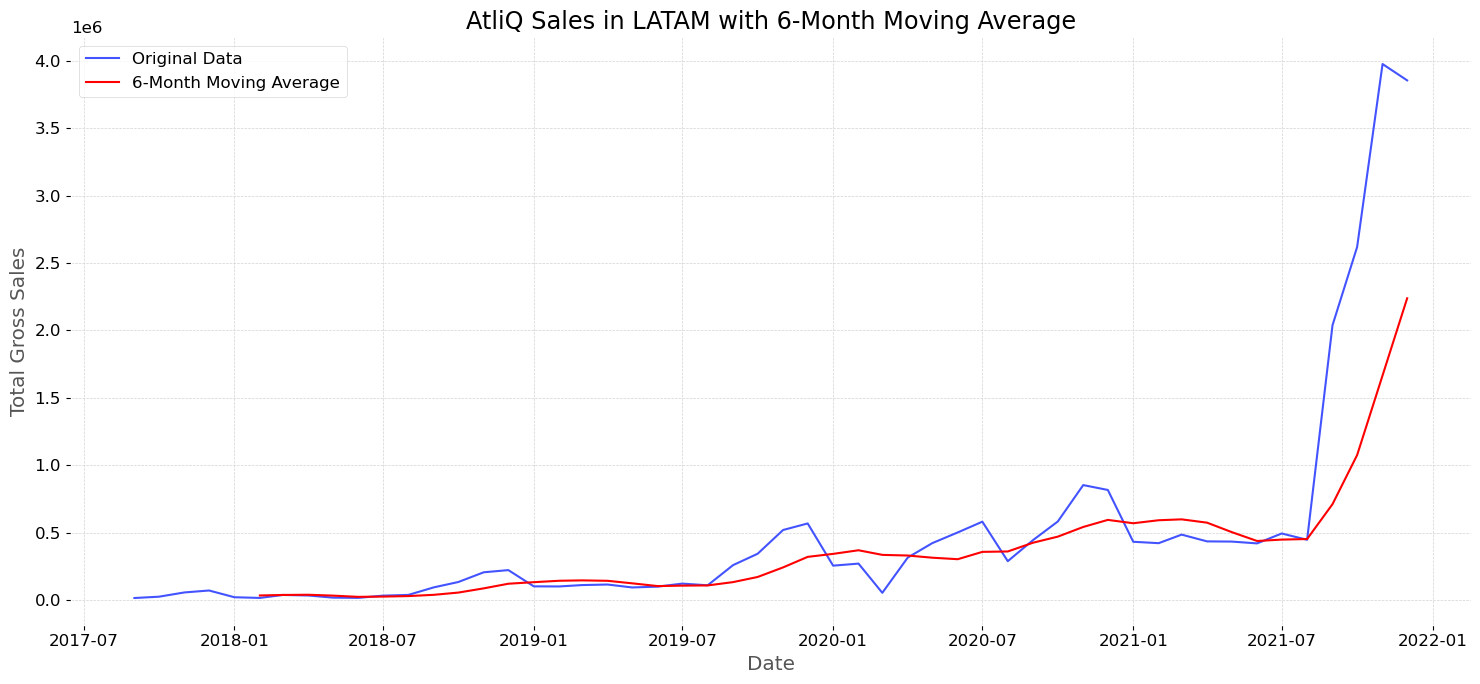

In [2]:
LATAM = pd.read_pickle("../../data/raw/AtliQ_sales_LATAM.pkl")
# Convert the 'date' column to datetime format
LATAM['date'] = pd.to_datetime(LATAM['date'])
plot_sales_with_moving_average(LATAM)

**Observaciones:**  
- Se puede observar un crecimiento aparentemente exponencial en las ventas totales. Esta tendencia sugiere que las ventas han estado aumentando a un ritmo acelerado durante el período representado en los datos.

- El promedio móvil de 6 meses muestra una tendencia clara y menos ruido en comparación con los datos originales, lo que facilita la identificación de patrones y tendencias generales.  

El problema es que dejamos de obtener informacion historica a partir de esos ultimos 6 meses, cuando el crecimiento comenzo a ser el punto pivotal de la imagen, 
A que factores se habran debido esas ventas??  

Pues, veamoslo, tenemos demasiados datos para visualizar el crecimiento de las ventas en latinoamerica con cada venta del periodo!!

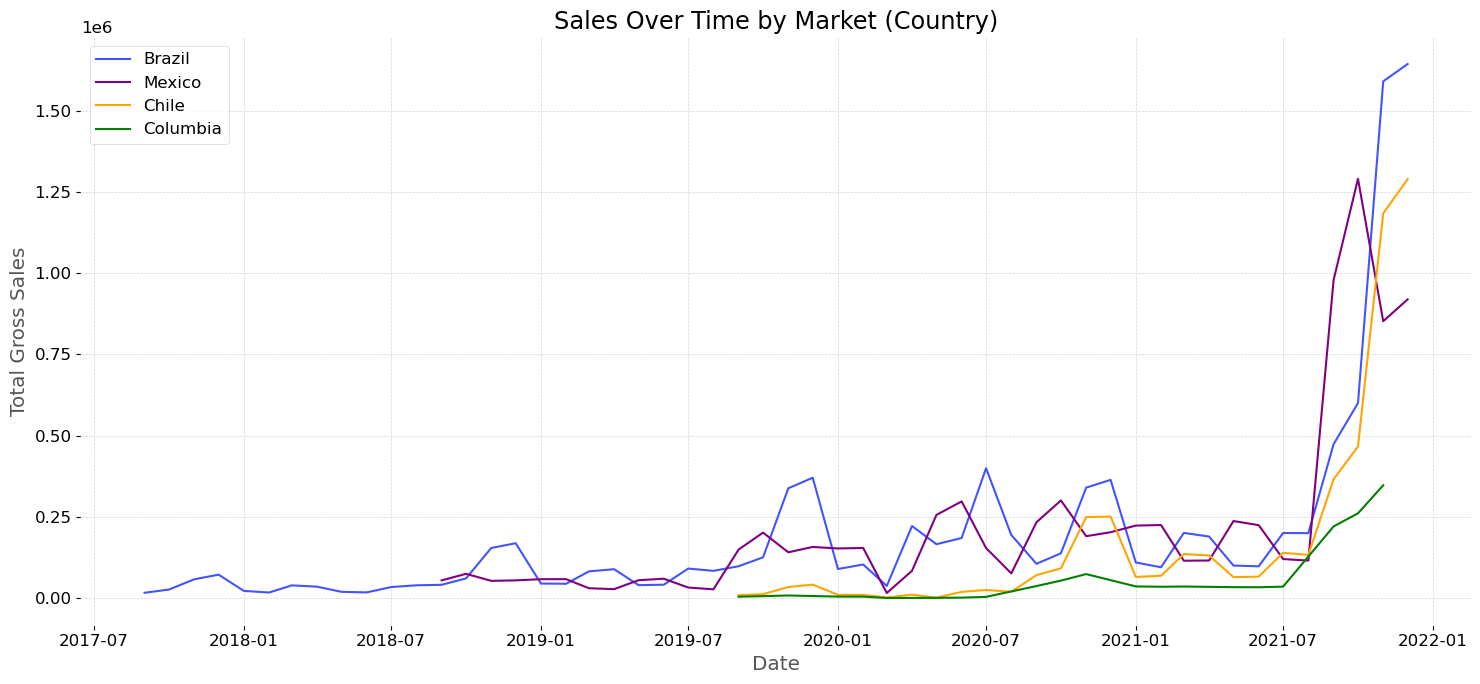

In [3]:
plot_sales_by_market(LATAM)

Bien! Podemos ver que Brasil es la que lleva mas tiempo en el mercado, que Mexico tuvo una caida drastica cerca de Ocutbre-Noviembre / 2021 y que quiza haya tenido un motivo importante, pero la que me interesa analizar es Chile, puesto que es la mas corta y con mayor crecimiento exponencial comparada a su longitud en el tiempo:

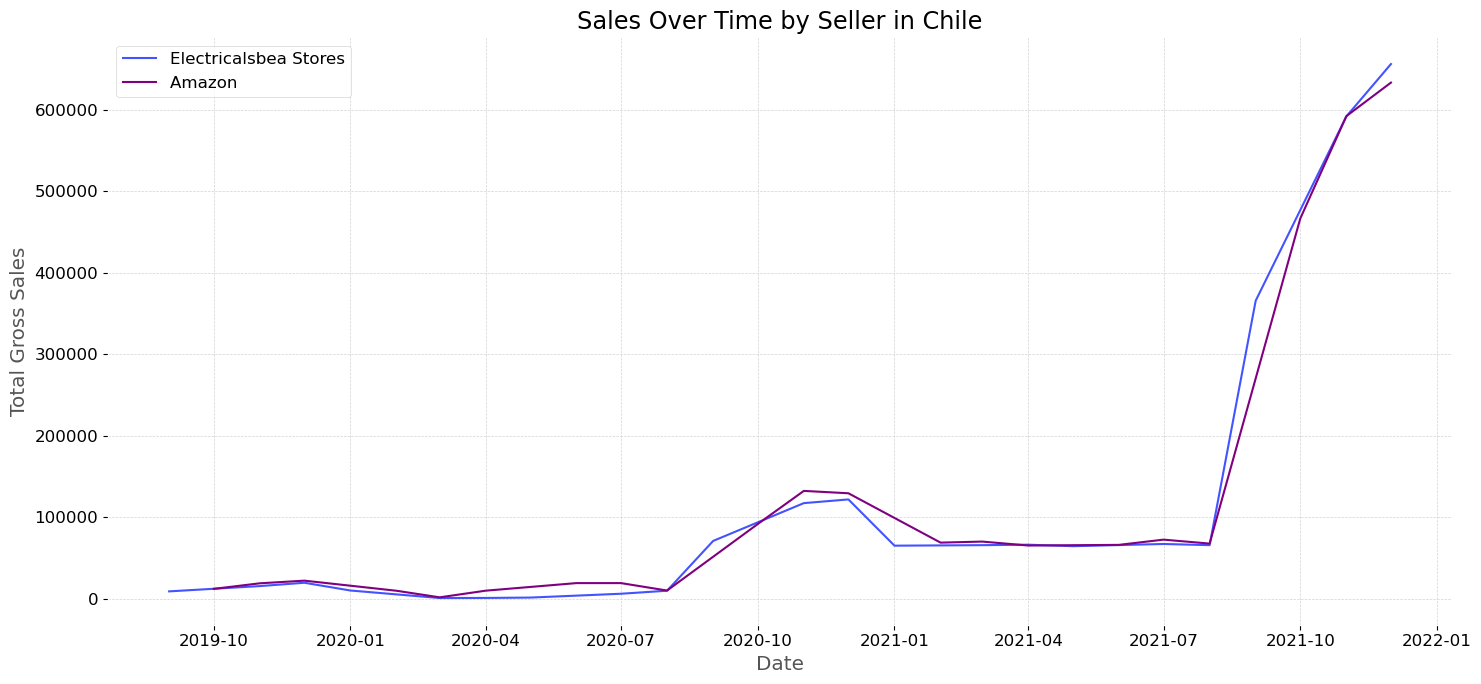

In [4]:
chile = LATAM.query('market == "Chile"')
plot_sales_by_customer(chile)

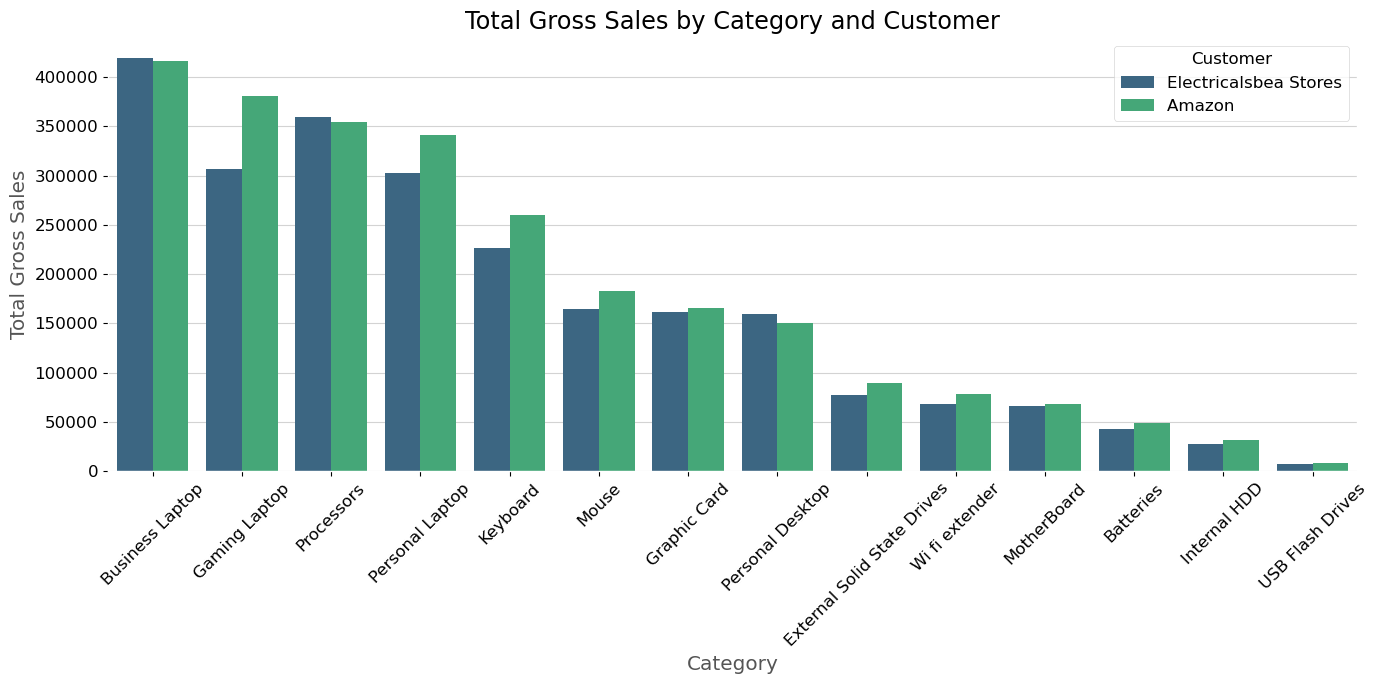

In [5]:
plot_sales_by_category_and_customer(chile)

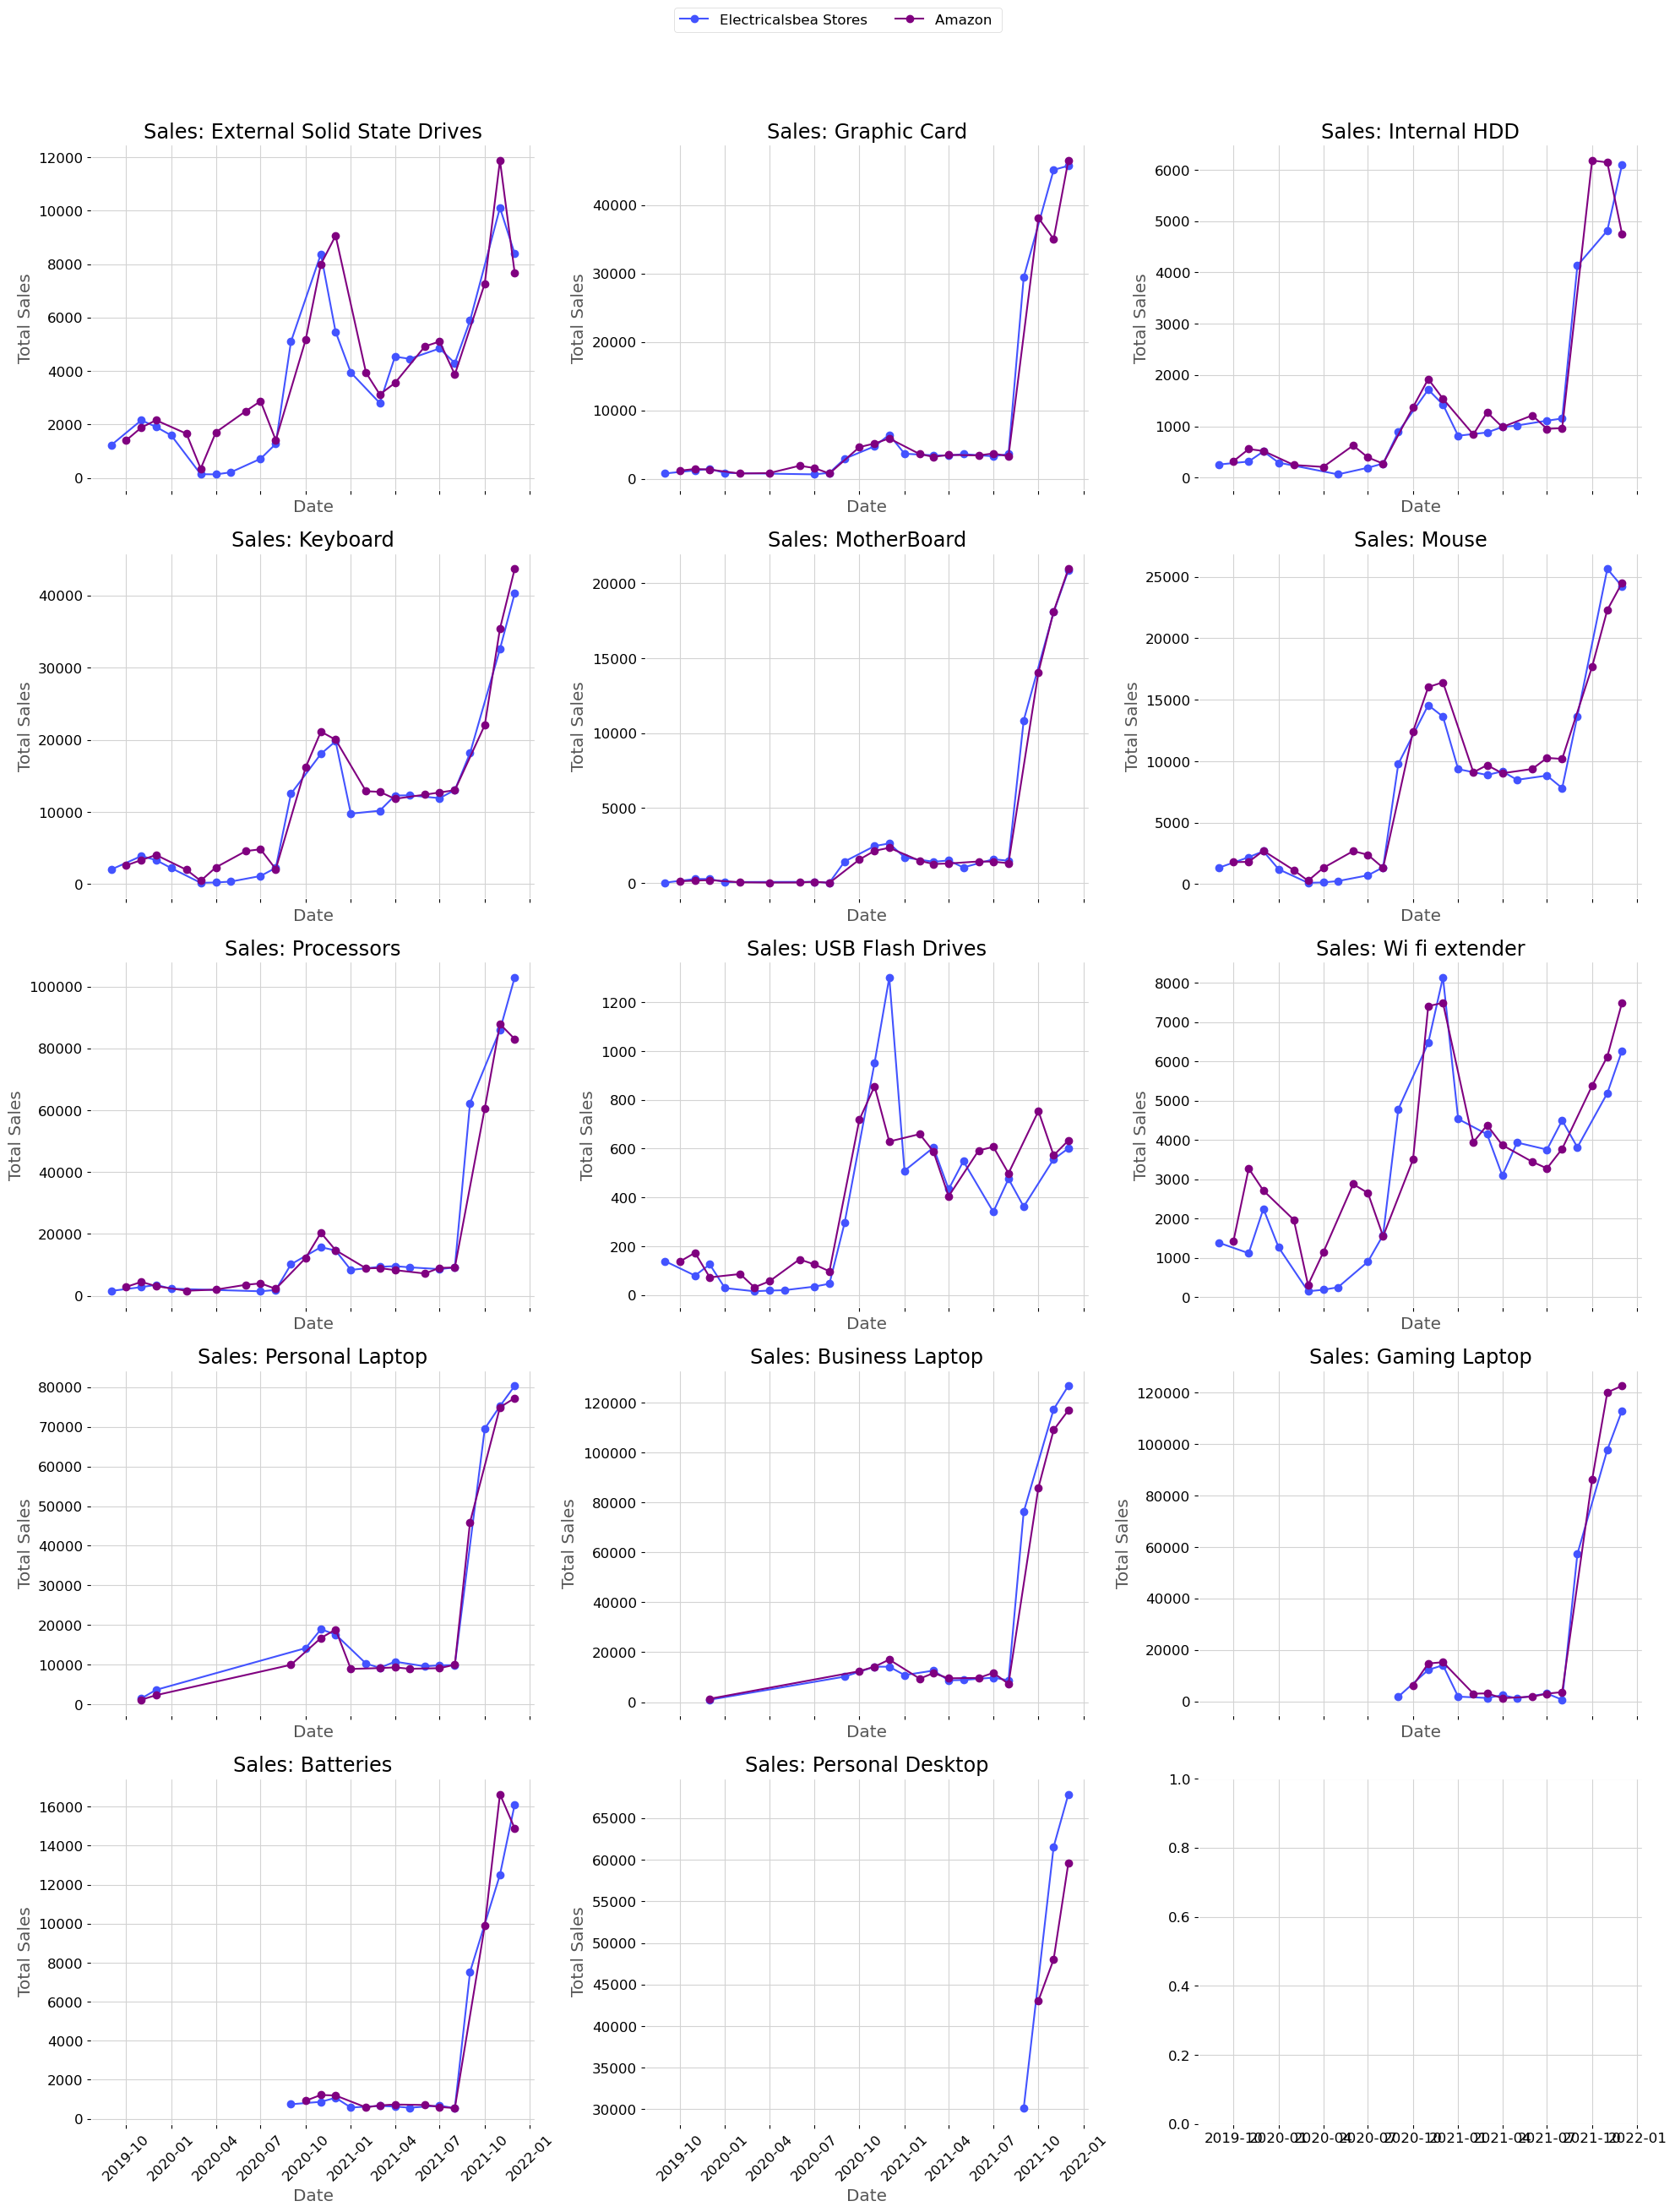

In [6]:
plot_sales_category_matrix(chile)

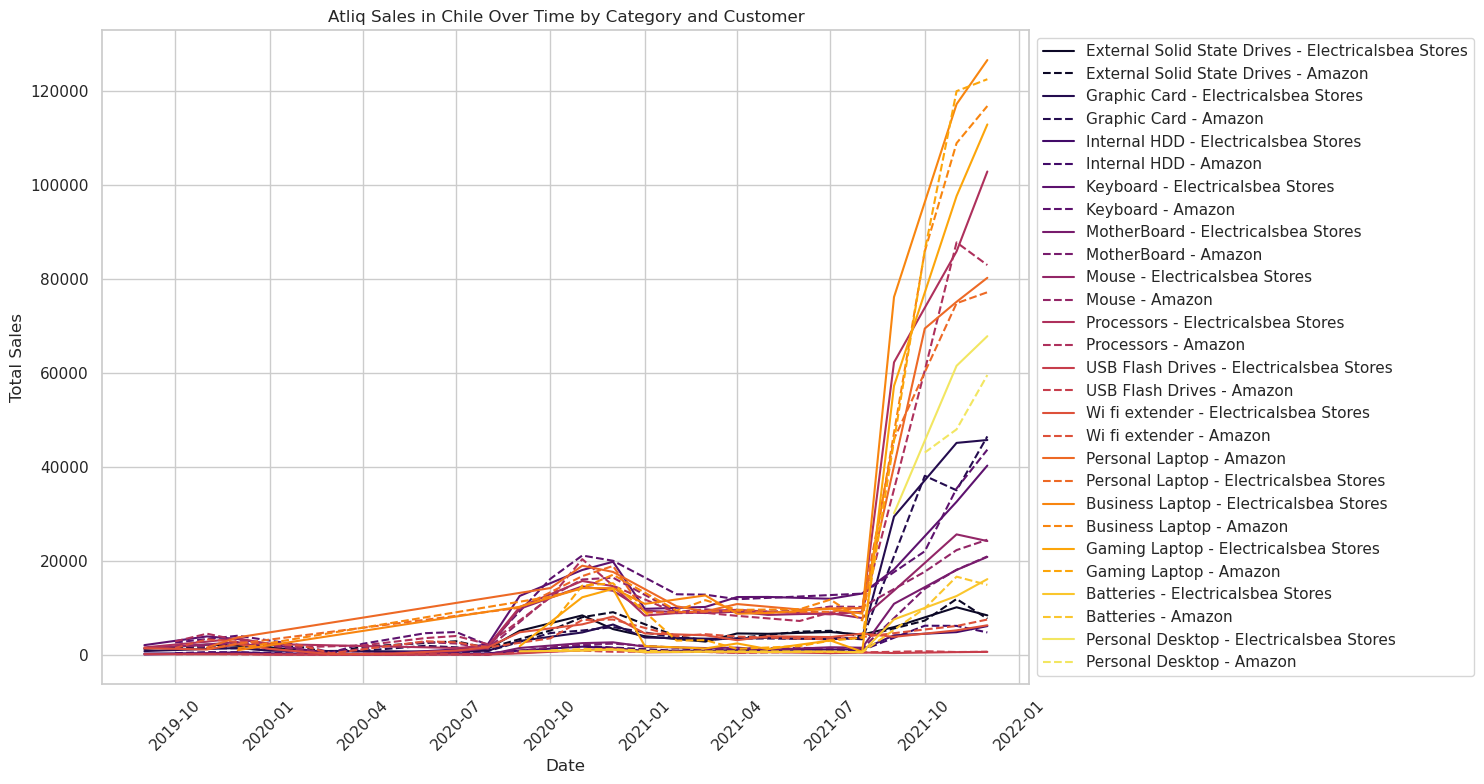

In [7]:
plot_sales_by_category(chile)

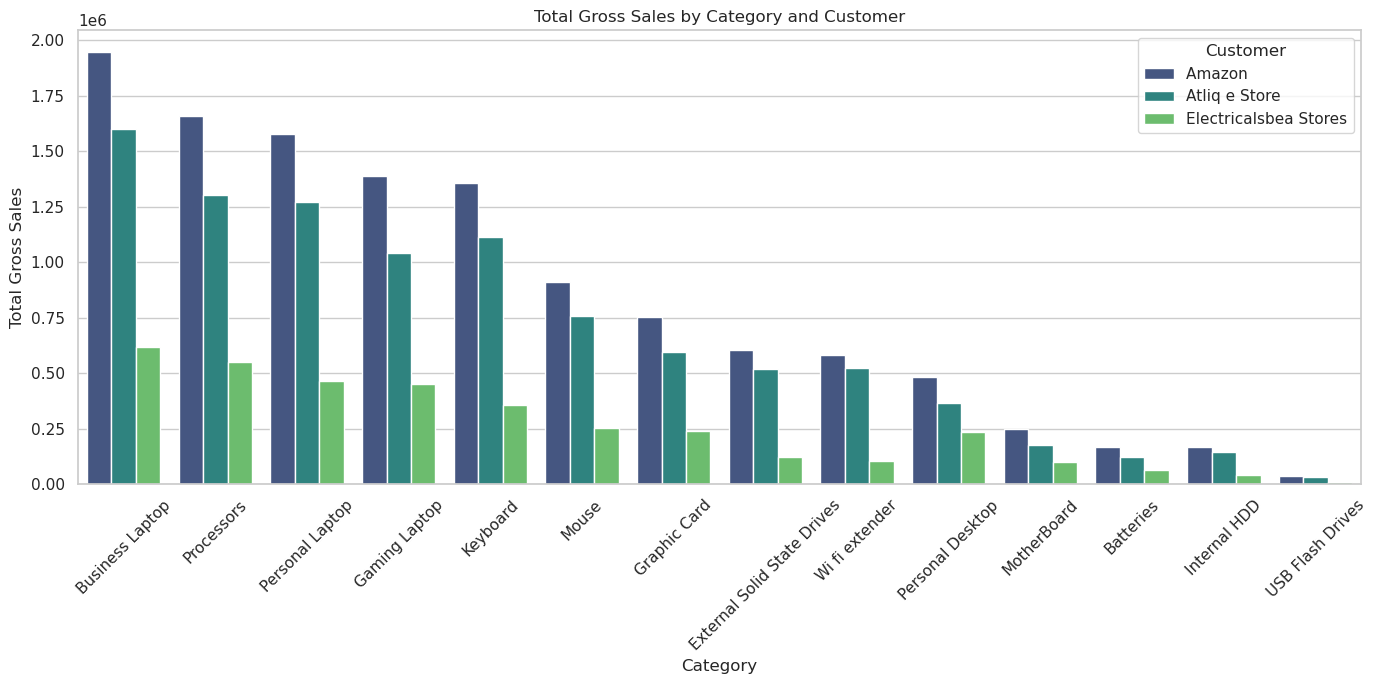

In [8]:
plot_sales_by_category_and_customer(LATAM)

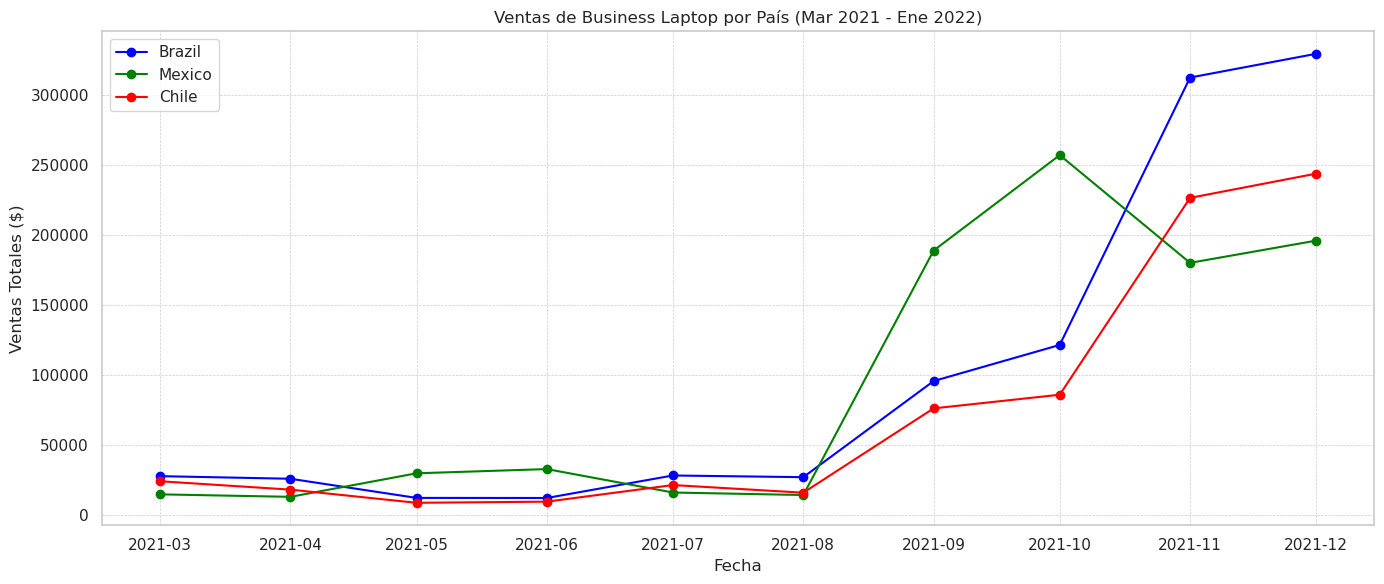

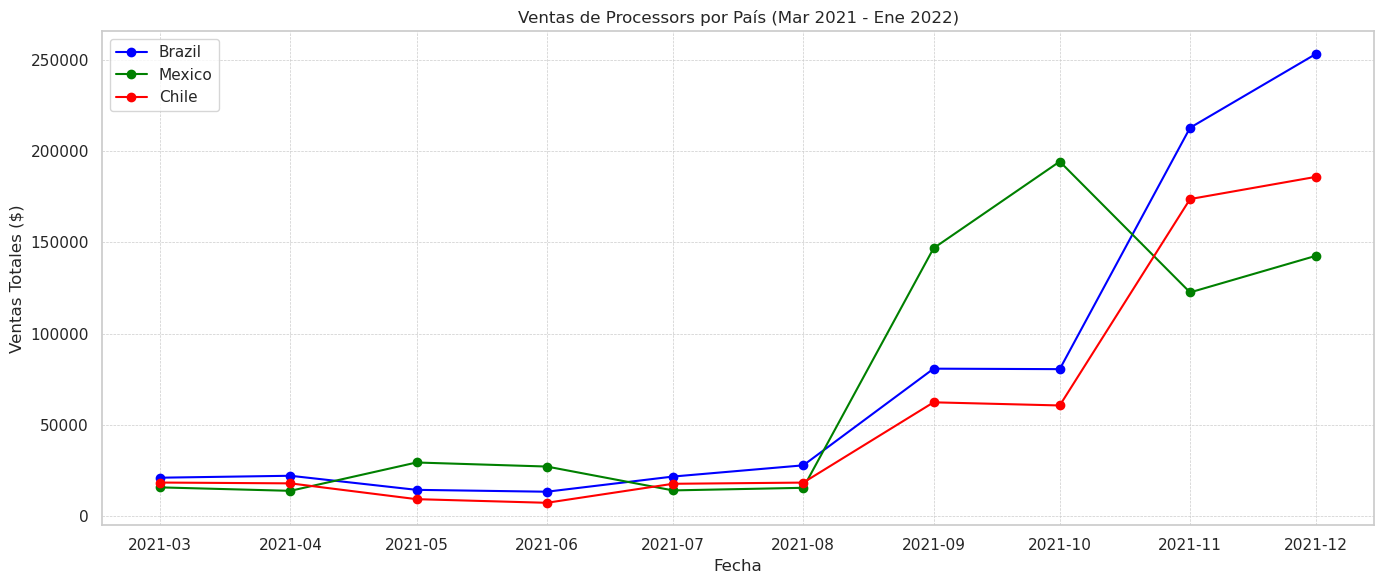

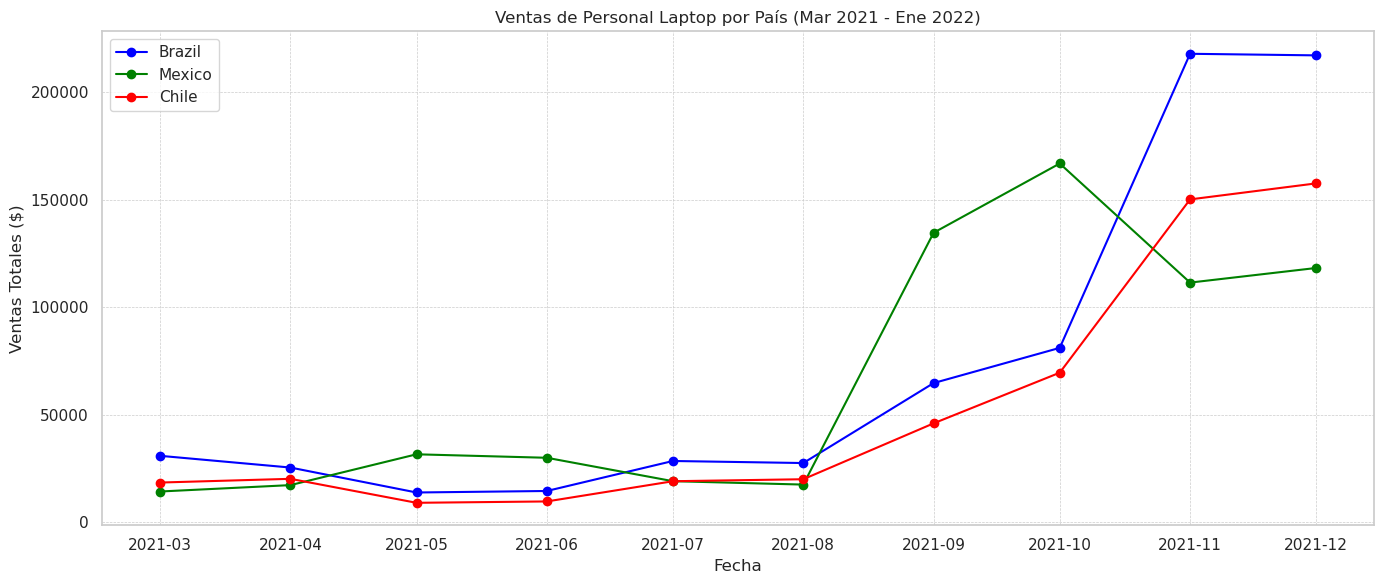

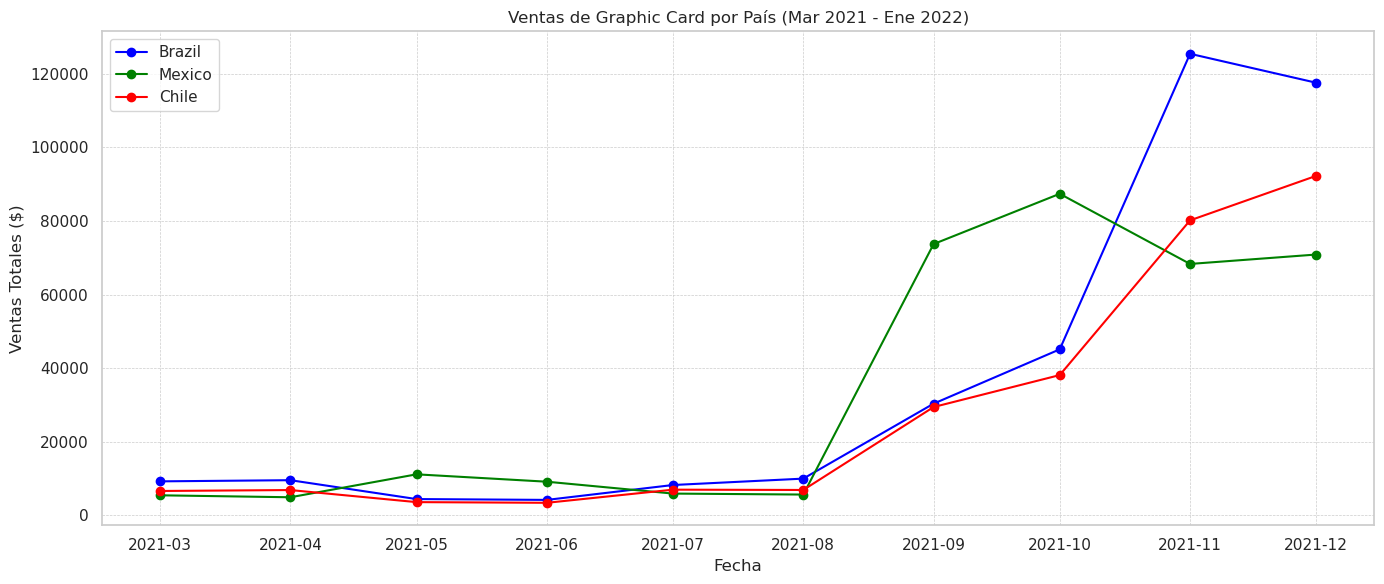

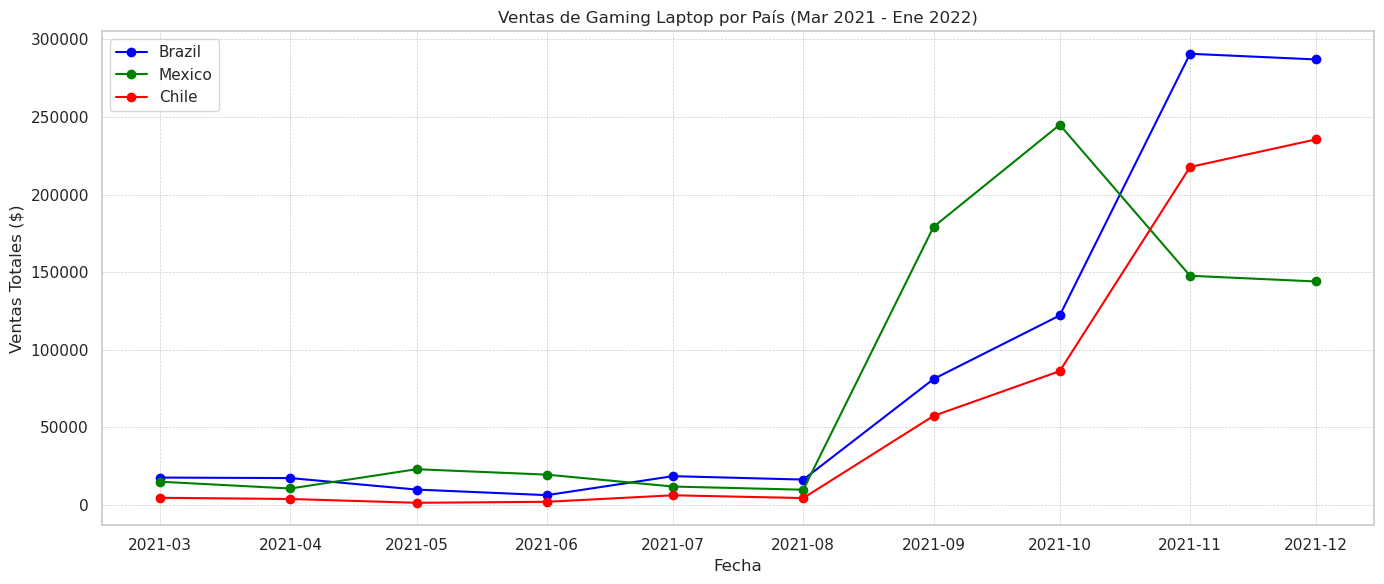

In [9]:
selected_categories = ['Business Laptop', 'Personal Laptop','Gaming Laptop','Processors','Graphic Card']
top_categories = LATAM.loc[LATAM['category'].isin(selected_categories)]

start_date = '2021-03-01'
end_date = '2022-01-31'

# date range filter
filtered_data = top_categories[(top_categories['date'] >= start_date) & (top_categories['date'] <= end_date)].reset_index(drop=True)
filtered_data2 = filtered_data.loc[~(filtered_data['market']=='Columbia')]

plot_sales_by_selected_categories_countries(filtered_data2)
